In [3]:
import re
from datetime import datetime
import os

# Define the directory path where the files are stored
directory_path = 'Z:/Lab Data/Qudit_Ramsey_raw_data/Raw_data_PD/'

# Function to parse the filename and extract relevant information
def parse_filename(filename):
    pattern = r'Ramsey_experiment_\[\[([+-]?\d+), ([+-]?\d+), ([+-]?\d+)\], \[([+-]?\d+), ([+-]?\d+), ([+-]?\d+)\]\]_(\d+)_us_none_(\d{8})_(\d{4})\.txt'
    match = re.search(pattern, filename)
    if match:
        num1 = int(match.group(1))  # First number in the first triplet
        num2 = int(match.group(2))  # Second number in the first triplet
        num3 = int(match.group(3))  # Third number in the first triplet
        num4 = int(match.group(4))  # First number in the second triplet
        num5 = int(match.group(5))  # Second number in the second triplet
        num6 = int(match.group(6))  # Third number in the second triplet
        wait_time = int(match.group(7))  # Wait time in microseconds
        date_str = match.group(8) + match.group(9)
        date_time = datetime.strptime(date_str, '%Y%m%d%H%M')  # Date and time
        transition_str = f"p{num1}{num2}{num3}_p{num4}{num5}{num6}"  # Create transition string
        return num1, num2, num3, num4, num5, num6, wait_time, date_time, transition_str
    else:
        return None, None, None, None, None, None, None, None, None

# Function to extract raw data filenames from the content of a file
def extract_raw_data_filenames(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
    
    # Extract the raw data filenames from the last line and convert to a list
    raw_data_filenames_line = lines[-1].strip()
    raw_data_filenames = [name.strip().strip("'\"") for name in raw_data_filenames_line.strip('[]').split(',')]

    return raw_data_filenames

# Search for files with the same date-time pattern and create a dictionary of wait times
def search_files_by_datetime(directory, target_date_times):
    wait_time_dict = {}
    mf1, F, mf2 = None, None, None
    
    # Loop over all files in the directory
    for filename in os.listdir(directory):
        # Only process files that match the expected pattern
        if filename.startswith('Ramsey_experiment'):
            num1, num2, num3, num4, num5, num6, wait_time, date_time, transition_str = parse_filename(filename)
            # Check if the current file's date-time matches any in the target date-times
            if date_time in target_date_times:
                # Save transition data
                num1_, num2_, num3_, num4_, num5_, num6_ = num1, num2, num3, num4, num5, num6
                # Parse the raw data filenames for this file
                file_path = os.path.join(directory, filename)
                raw_data_filenames = extract_raw_data_filenames(file_path)
                
                # Update the dictionary with wait times and file paths
                if wait_time not in wait_time_dict:
                    wait_time_dict[wait_time] = []
                
                # Append file paths to the list of file paths for this wait time
                Z_drive_raw_data = ''
                raw_data_filepaths = [Z_drive_raw_data + raw_filename for raw_filename in raw_data_filenames]
                wait_time_dict[wait_time].extend(raw_data_filepaths)
    
    return wait_time_dict, num1_, num2_, num3_, num4_, num5_, num6_

def extract_datetime_strings(file_path, target_entry):
    with open(file_path, 'r') as file:
        for line in file:
            stripped_line = line.strip()
            
            # Find the index of the first closing bracket (end of the target entry)
            end_idx = stripped_line.index(']]') + 2
            
            # Extract the first part (the target entry) and evaluate it
            first_entry = eval(stripped_line[:end_idx])
            print(first_entry)
            # Check if the first entry matches the target entry
            if first_entry == target_entry:
                components = stripped_line.split(', [')
                last_entry = '[' + components[-1]
                print(last_entry)
                date_time_list = eval(last_entry)
                
                return date_time_list
    
    # If no matching entry is found, return None
    return None


dt_list = extract_datetime_strings('Bused_T2_times_log.txt',[[0, 2, 0], [0, 2, 2]])
target_date_times = []
for i in dt_list:
    target_date_times.append(datetime.strptime(i, '%Y%m%d_%H%M'))
print(target_date_times)
wait_time_dict, num1, num2, num3, num4, num5, num6 = search_files_by_datetime(directory_path, target_date_times)

# Output the results
print(f"Transition: p{num1}{num2}{num3}_p{num4}{num5}{num6} (mF1: {num1}, F1: {num2}, mF2: {num3}, mF3: {num4}, F2: {num5}, mF4: {num6})")
print("Dictionary of wait times and corresponding raw data file paths:")
for wait_time, file_paths in wait_time_dict.items():
    print(f"Wait time: {wait_time} us")
    for path in file_paths:
        print(f"  {path}")

# if 2300 in wait_time_dict:
#     del wait_time_dict[2300]


[[0, 2, 0], [0, 2, 2]]
['20250314_1451', '20250314_1635']
[datetime.datetime(2025, 3, 14, 14, 51), datetime.datetime(2025, 3, 14, 16, 35)]
Transition: p020_p022 (mF1: 0, F1: 2, mF2: 0, mF3: 0, F2: 2, mF4: 2)
Dictionary of wait times and corresponding raw data file paths:
Wait time: 0 us
  Z:\\Lab Data\\Qudit_Ramsey_raw_data\\Raw_data_copied\\2025\\2025_03\\2025_03_14\\Bussed_qubits_for_MFNC_051
  Z:\\Lab Data\\Qudit_Ramsey_raw_data\\Raw_data_copied\\2025\\2025_03\\2025_03_14\\Bussed_qubits_for_MFNC_052
  Z:\\Lab Data\\Qudit_Ramsey_raw_data\\Raw_data_copied\\2025\\2025_03\\2025_03_14\\Bussed_qubits_for_MFNC_053
  Z:\\Lab Data\\Qudit_Ramsey_raw_data\\Raw_data_copied\\2025\\2025_03\\2025_03_14\\Bussed_qubits_for_MFNC_054
  Z:\\Lab Data\\Qudit_Ramsey_raw_data\\Raw_data_copied\\2025\\2025_03\\2025_03_14\\Bussed_qubits_for_MFNC_055
  Z:\\Lab Data\\Qudit_Ramsey_raw_data\\Raw_data_copied\\2025\\2025_03\\2025_03_14\\Bussed_qubits_for_MFNC_056
  Z:\\Lab Data\\Qudit_Ramsey_raw_data\\Raw_data_copi

In [130]:
# import numpy as np
# import json

# # Function to calculate the shelving threshold
# def get_shelving_threshold(counts):
#     data_sorted = np.sort(counts, axis=None)
#     # Truncate outliers at the start and end
#     data_sorted = data_sorted[100:-100]
#     if len(data_sorted) > 1000:
#         data_sorted = data_sorted[0:-1:round(data_sorted.size / (len(counts) * 0.0250167))]
#     data_sorted_diff = data_sorted[1:-1] - data_sorted[0:-2]
#     data_diff_max = max(data_sorted_diff)
#     data_diff_maxind = np.argmax(data_sorted_diff)
#     threshold = data_diff_max / 2 + data_sorted[data_diff_maxind]
#     return threshold, data_sorted

# # Function to process raw data for each wait time
# def process_raw_data_files(raw_data_filepaths, Num_points_to_ignore=1):
#     arrays = []
#     # Read and process the data from all raw data files
#     for file_path in raw_data_filepaths:
#         with open(file_path, 'r') as file:
#             for line in file:
#                 data = json.loads(line)
#                 arrays.append(data[0]["0"])
#     # print(arrays)
#     # Convert to numpy array
#     hist_data = np.array(arrays)
    
#     # Flatten the hist_data and compute shelving threshold
#     flat_hist_data = hist_data.flatten()
#     threshold, _ = get_shelving_threshold(flat_hist_data)
#     # Prepare for further processing (3D array)
#     arrays_3d = []
#     for file_path in raw_data_filepaths[:]:
#         arrays = []
#         with open(file_path, 'r') as file:
#             for line in file:
#                 data = json.loads(line)
#                 arrays.append(data[0]["0"][:])
#         arrays_3d.append(arrays)

#     # Convert to numpy array
#     bool_array = np.array(arrays_3d) > threshold
#     result_matrix = np.full(bool_array.shape, False, dtype=bool)
#     # print(bool_array)
#     # Process to identify the first occurrence of shelving (True value)
#     for matrix_index in range(bool_array.shape[0]):
#         for row_index in range(bool_array.shape[1]):
#             true_indices = np.where(bool_array[matrix_index, row_index, :])
#             if true_indices[0].size > 0:
#                 first_true_index = true_indices[0]
#                 # print(first_true_index)
#                 if first_true_index[0] != 0:
#                     result_matrix[matrix_index, row_index, first_true_index[0]] = True
    
#     # Filter data and compute percentages used
#     filtered_data_array = []
#     percentage_data_used = []
#     num_points = bool_array.shape[0]  # Determine the number of data points
#     for i in range(num_points):
#         data = result_matrix[i]
#         rows_with_any_true = data.any(axis=1)
#         filtered_data = data[rows_with_any_true]
#         filtered_data_array.append(filtered_data)
#         percentage_data_used.append(filtered_data.shape[0] / data.shape[0])
#     # print(filtered_data_array)
#     # Compute ket data by averaging the filtered data

#     def find_errors(num_SD, full_data_array, exp_num):
#         upper_error = ((full_data_array + (num_SD**2 / (2 * exp_num))) /
#                        (1 + (num_SD**2 / exp_num))) + (np.sqrt(
#                            ((full_data_array *
#                              (1 - full_data_array) * num_SD**2) / exp_num) +
#                            (num_SD**4 /
#                             (4 * exp_num**2)))) / (1 + (num_SD**2 / exp_num))
    
#         lower_error = ((full_data_array + (num_SD**2 / (2 * exp_num))) /
#                        (1 + (num_SD**2 / exp_num))) - (np.sqrt(
#                            ((full_data_array *
#                              (1 - full_data_array) * num_SD**2) / exp_num) +
#                            (num_SD**4 /
#                             (4 * exp_num**2)))) / (1 + (num_SD**2 / exp_num))
    
#         return lower_error, upper_error
    
#     ket_data = []
#     for i in filtered_data_array:
#         ket_data.append(np.mean(i, axis=0)[1])
        
#     lower, upper = find_errors(1, np.array(ket_data), len(ket_data))
#     return ket_data

# # Process all wait times in the dictionary
# def process_all_wait_times(wait_time_dict):
#     processed_data_dict = {}
    
#     for wait_time, raw_data_filepaths in wait_time_dict.items():
#         ket_data = process_raw_data_files(raw_data_filepaths)
#         processed_data_dict[wait_time] = np.array(ket_data)
    
#     return processed_data_dict


# processed_data = process_all_wait_times(wait_time_dict)

# # Output example
# print("Processed Data Dictionary:")
# for wait_time, ket_data_list in processed_data.items():
#     print(f"Wait Time: {wait_time} us")
#     print(f"Ket Data: {ket_data_list}")


In [131]:
import numpy as np
import json

# Function to calculate the shelving threshold
def get_shelving_threshold(counts):
    data_sorted = np.sort(counts, axis=None)
    # Truncate outliers at the start and end
    data_sorted = data_sorted[100:-100]
    if len(data_sorted) > 1000:
        data_sorted = data_sorted[0:-1:round(data_sorted.size / (len(counts) * 0.0250167))]
    data_sorted_diff = data_sorted[1:-1] - data_sorted[0:-2]
    data_diff_max = max(data_sorted_diff)
    data_diff_maxind = np.argmax(data_sorted_diff)
    threshold = data_diff_max / 2 + data_sorted[data_diff_maxind]
    return threshold, data_sorted

# Function to process raw data for each wait time
def process_raw_data_files(raw_data_filepaths):
    arrays = []
    # Read and process the data from all raw data files
    for file_path in raw_data_filepaths:
        with open(file_path, 'r') as file:
            for line in file:
                data = json.loads(line)
                arrays.append(data[0]["0"])
    # Convert to numpy array
    hist_data = np.array(arrays)
    
    # Flatten the hist_data and compute shelving threshold
    flat_hist_data = hist_data.flatten()
    threshold, _ = get_shelving_threshold(flat_hist_data)
    print(threshold)
    # Prepare for further processing (3D array)
    arrays_3d = []
    for file_path in raw_data_filepaths[:]:
        arrays = []
        with open(file_path, 'r') as file:
            for line in file:
                data = json.loads(line)
                arrays.append(data[0]["0"][:])
        if len(arrays) == 0:
            arrays = list(np.full((100, 4), 40))
        arrays_3d.append(arrays)

    bool_array = np.array(arrays_3d) > threshold
    result_matrix = np.full(bool_array.shape, False, dtype=bool)
    # Process to identify the first occurrence of shelving (True value)
    for matrix_index in range(bool_array.shape[0]):
        for row_index in range(bool_array.shape[1]):
            true_indices = np.where(bool_array[matrix_index, row_index, :])
            if true_indices[0].size > 0:
                first_true_index = true_indices[0]
                if first_true_index[0] != 0:
                    result_matrix[matrix_index, row_index, first_true_index[0]] = True

    # Filter data and compute percentages used
    filtered_data_array = []
    percentage_data_used = []
    num_points = bool_array.shape[0]  # Determine the number of data points
    for i in range(num_points):
        data = result_matrix[i]
        rows_with_any_true = data.any(axis=1)
        filtered_data = data[rows_with_any_true]
        filtered_data_array.append(filtered_data)
        percentage_data_used.append(filtered_data.shape[0] / data.shape[0])

    # Compute ket data by averaging the filtered data

    def find_errors(num_SD, full_data_array, exp_num):
        upper_error = ((full_data_array + (num_SD**2 / (2 * exp_num))) /
                       (1 + (num_SD**2 / exp_num))) + (np.sqrt(
                           ((full_data_array *
                             (1 - full_data_array) * num_SD**2) / exp_num) +
                           (num_SD**4 /
                            (4 * exp_num**2)))) / (1 + (num_SD**2 / exp_num))

        lower_error = ((full_data_array + (num_SD**2 / (2 * exp_num))) /
                       (1 + (num_SD**2 / exp_num))) - (np.sqrt(
                           ((full_data_array *
                             (1 - full_data_array) * num_SD**2) / exp_num) +
                           (num_SD**4 /
                            (4 * exp_num**2)))) / (1 + (num_SD**2 / exp_num))

        return lower_error, upper_error

    ket_data = []
    exp_num_list = []
    for i in filtered_data_array:
        ket_data.append(np.mean(i, axis=0)[1])
        exp_num_list.append(len(i))
    lower_error, upper_error = find_errors(1, np.array(ket_data), np.array(exp_num_list))
    print(np.array(ket_data), np.array(exp_num_list))
    return ket_data, lower_error, upper_error

# Process all wait times in the dictionary
def process_all_wait_times(wait_time_dict):
    processed_data_dict = {}
    
    for wait_time, raw_data_filepaths in wait_time_dict.items():
        ket_data, lower_error, upper_error = process_raw_data_files(raw_data_filepaths)
        processed_data_dict[wait_time] = {
            'ket_data': np.array(ket_data),
            'lower_error':np.array(ket_data) - np.array(lower_error),
            'upper_error': np.array(upper_error) - np.array(ket_data)
        }
    
    return processed_data_dict

processed_data = process_all_wait_times(wait_time_dict)

# Output example
print("Processed Data Dictionary:")
for wait_time, data in processed_data.items():
    print(f"Wait Time: {wait_time} us")
    print(f"Ket Data: {data['ket_data']}")
    print(f"Lower Error: {data['lower_error']}")
    print(f"Upper Error: {data['upper_error']}")


14.5
[0.74736842 0.93684211 0.98       0.84693878 0.55670103 0.22340426
 0.03092784 0.09473684 0.23       0.58163265 0.76842105] [ 95  95 100  98  97  94  97  95 100  98  95]
14.5
[0.98989899 0.91836735 0.65656566 0.19791667 0.10204082 0.01020408
 0.20408163 0.30927835 0.68       0.89795918 0.96875   ] [ 99  98  99  96  98  98  98  97 100  98  96]
15.5
[0.85858586 0.90816327 0.95       0.7979798  0.63265306 0.26041667
 0.11340206 0.01020408 0.15957447 0.3        0.34693878] [ 99  98 100  99  98  96  97  98  94 100  98]
13.0
[0.79166667 0.54081633 0.13       0.04123711 0.09278351 0.16326531
 0.33       0.62244898 0.94897959 0.95833333 0.84      ] [ 96  98 100  97  97  98 100  98  98  96 100]
14.5
[0.05050505 0.06060606 0.35       0.67       0.83157895 0.75757576
 0.47959184 0.82474227 0.33333333 0.04166667 0.70103093] [ 99  99 100 100  95  99  98  97  99  96  97]
15.0
[0.03030303 0.03125    0.06122449 0.03125    0.28571429 0.73469388
 0.80808081 0.67708333 0.71428571 0.09375    0.173469

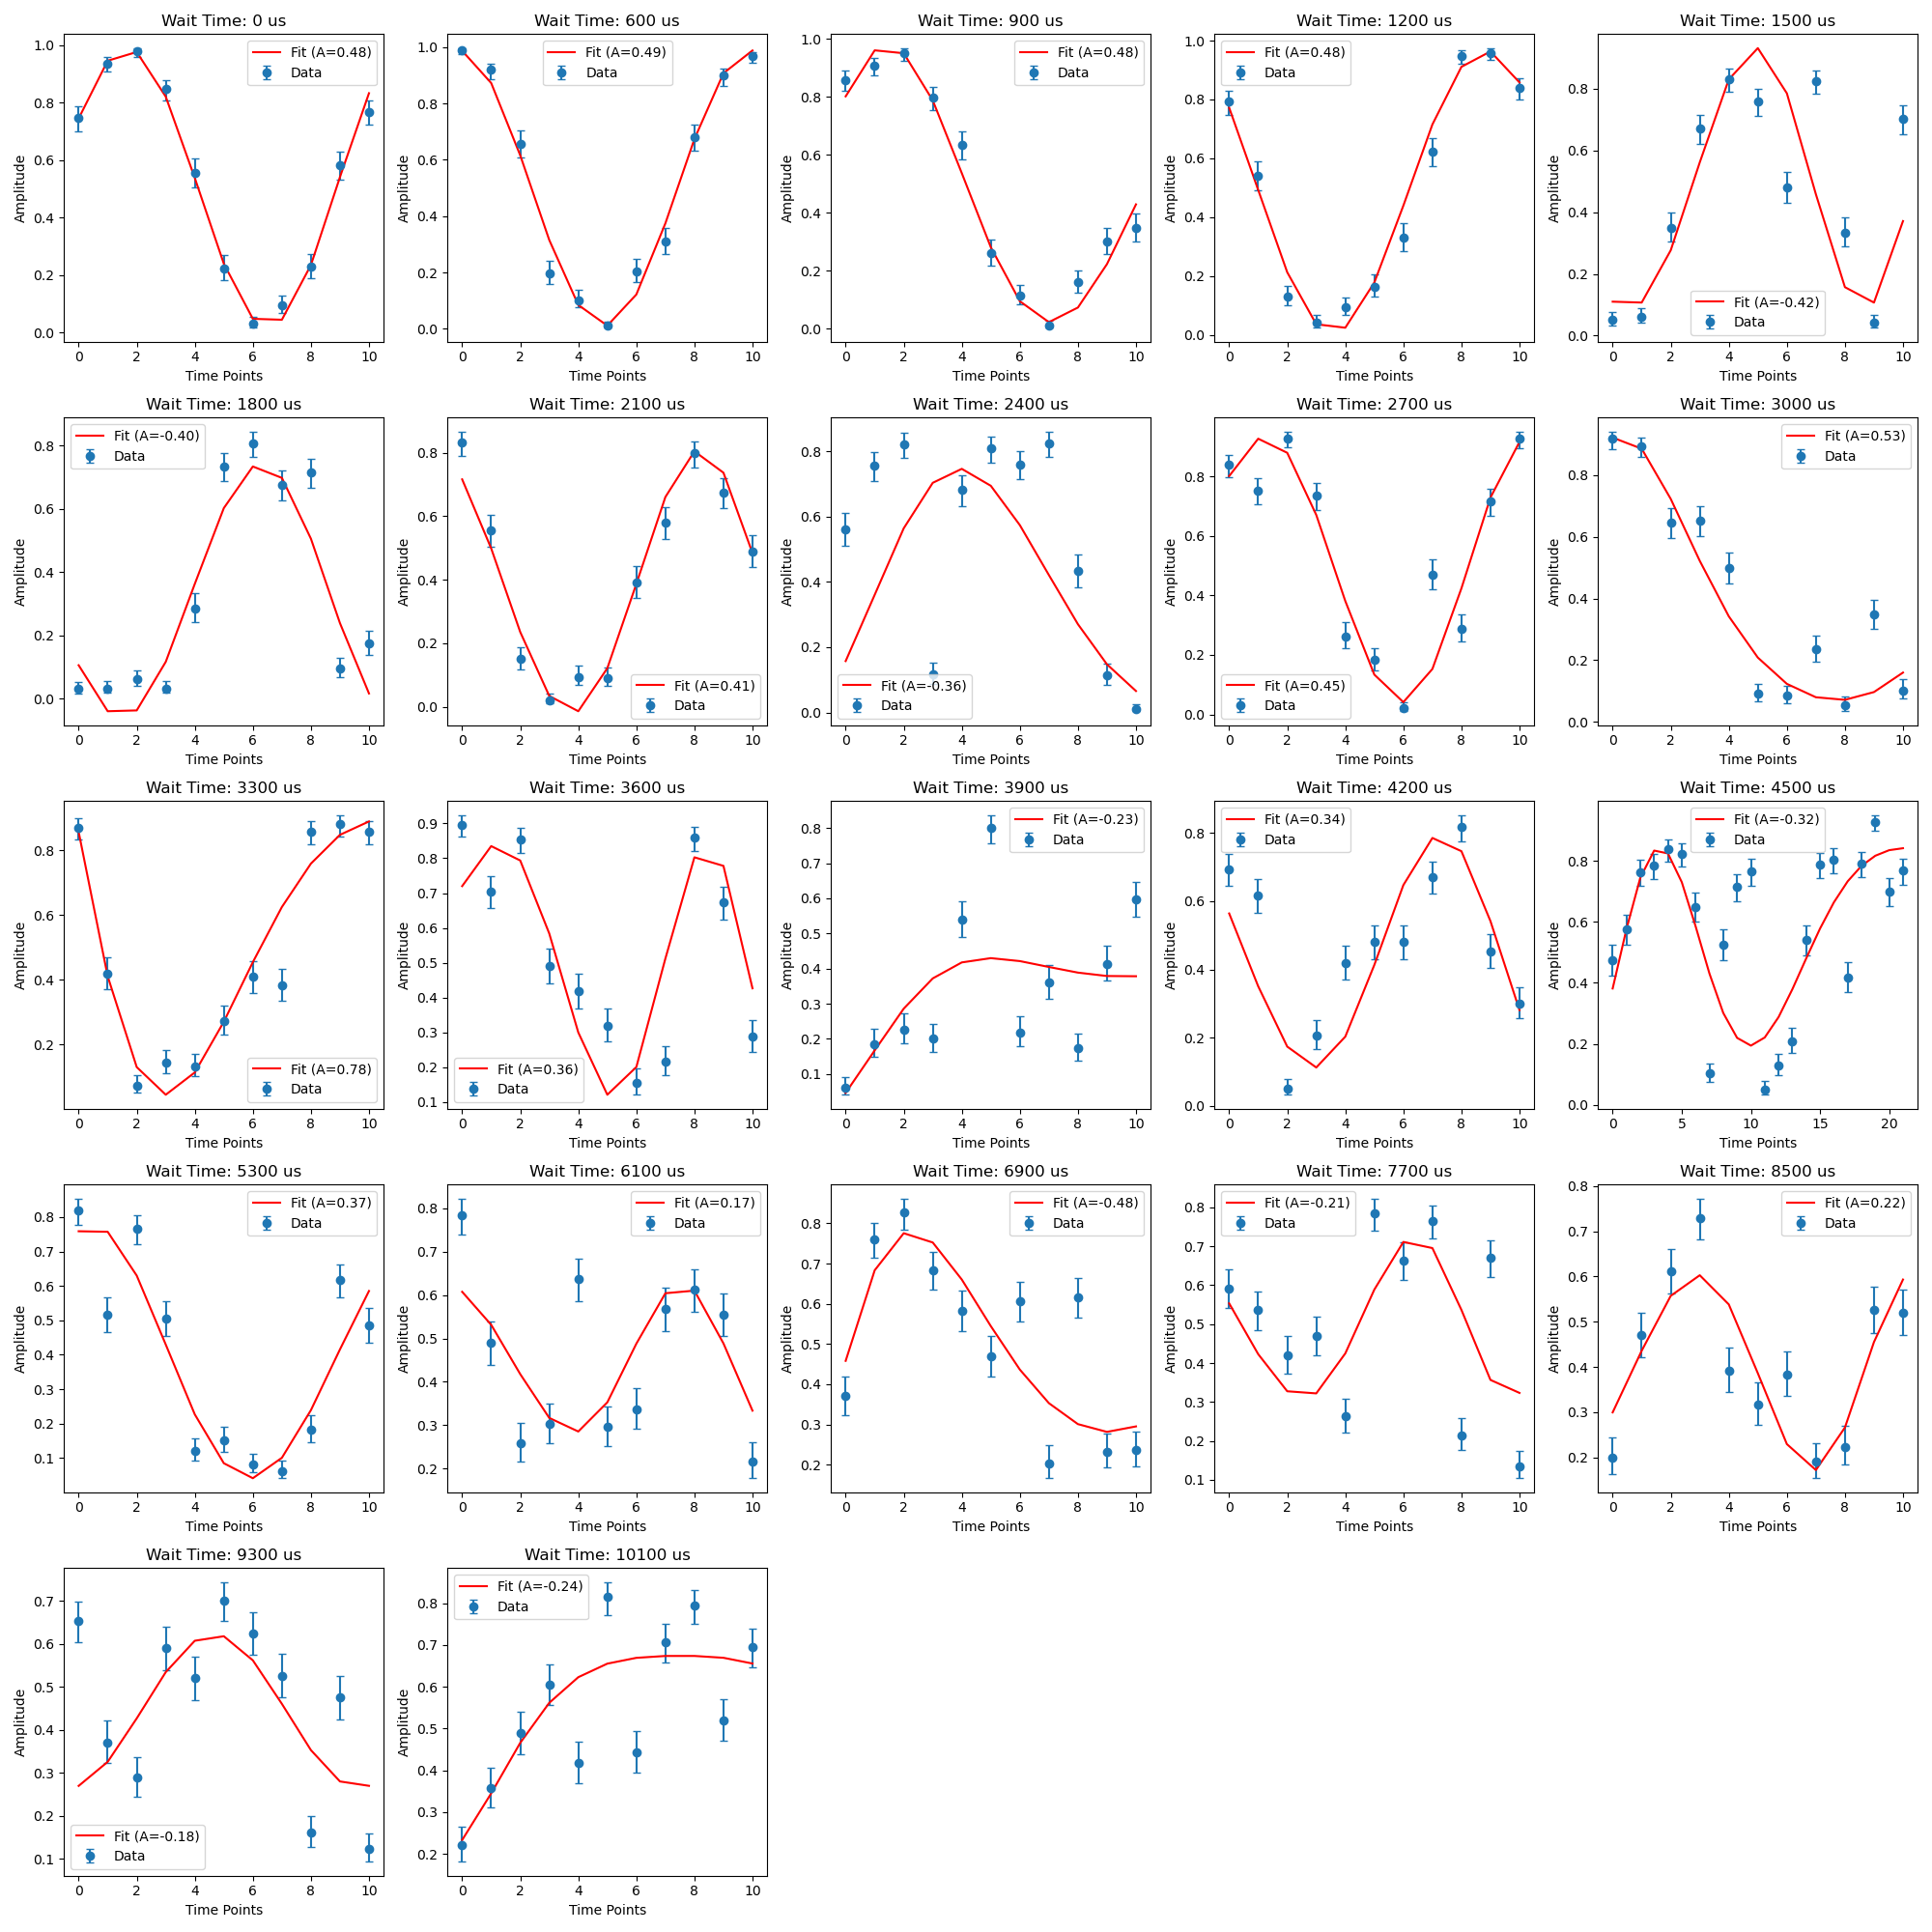

Fitted Amplitudes and Errors:
Wait Time: 0 us, Amplitude: 0.967 ± 0.02
Wait Time: 600 us, Amplitude: 0.978 ± 0.014
Wait Time: 900 us, Amplitude: 0.954 ± 0.019
Wait Time: 1200 us, Amplitude: 0.958 ± 0.022
Wait Time: 1500 us, Amplitude: 0.845 ± 0.031
Wait Time: 1800 us, Amplitude: 0.801 ± 0.03
Wait Time: 2100 us, Amplitude: 0.828 ± 0.029
Wait Time: 2400 us, Amplitude: 0.722 ± 0.067
Wait Time: 2700 us, Amplitude: 0.891 ± 0.023
Wait Time: 3000 us, Amplitude: 1.051 ± 0.068
Wait Time: 3300 us, Amplitude: 1.568 ± 0.102
Wait Time: 3600 us, Amplitude: 0.728 ± 0.037
Wait Time: 3900 us, Amplitude: 0.457 ± 0.057
Wait Time: 4200 us, Amplitude: 0.682 ± 0.037
Wait Time: 4500 us, Amplitude: 0.648 ± 0.023
Wait Time: 5300 us, Amplitude: 0.735 ± 0.034
Wait Time: 6100 us, Amplitude: 0.341 ± 0.042
Wait Time: 6900 us, Amplitude: 0.952 ± 0.144
Wait Time: 7700 us, Amplitude: 0.414 ± 0.04
Wait Time: 8500 us, Amplitude: 0.432 ± 0.04
Wait Time: 9300 us, Amplitude: 0.357 ± 0.037
Wait Time: 10100 us, Amplitude: 0.

In [132]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Sine function for fitting: A * cos(omega * t + phi) + offset
def sine_function(t, A,f, phi, offset):
    return A * np.cos(((np.pi*2/10+ f*t)*t+ phi)) + offset

# Function to fit ket_data to sine curve, extract amplitude and errors
def fit_sine_curve(ket_data, lower_error, upper_error):
    # Generate a time array for fitting (assuming equal intervals between points)
    t = np.arange(len(ket_data))
    
    # Remove NaN values from t, ket_data, and errors
    valid_indices = ~np.isnan(ket_data) & ~np.isnan(lower_error) & ~np.isnan(upper_error)
    t_valid = t[valid_indices]
    ket_data_valid = ket_data[valid_indices]
    lower_error_valid = lower_error[valid_indices]
    upper_error_valid = upper_error[valid_indices]
    
    # Compute symmetric errors as average of upper and lower errors
    sigma = (upper_error_valid + lower_error_valid) / 2.0
    
    # Avoid zero or negative sigma values
    sigma[sigma <= 0] = np.min(sigma[sigma > 0]) if np.any(sigma > 0) else 1.0
    
    # Initial guesses for amplitude (A), phase (phi), and offset
    initial_guess = [(np.max(ket_data_valid) - np.min(ket_data_valid)),0, 0, np.mean(ket_data_valid)]
    
    try:
        # Fit the ket_data to the sine function using weights
        params, covariance = curve_fit(
            sine_function,
            t_valid,
            ket_data_valid,
            p0=initial_guess,
            sigma=sigma,
            absolute_sigma=True
        )
        
        # Extract standard deviation errors from the covariance matrix
        if covariance is not None:
            errors = np.sqrt(np.diag(covariance))
            # Handle infinite errors by setting them to None
            errors = [error if np.isfinite(error) else None for error in errors]
        else:
            errors = [None] * len(params)
        
        # Return the parameters of the fit and their errors
        return params, errors
    except RuntimeError:
        # If the fit fails, return None
        return None, None

# Process the entire processed_data dictionary and fit each ket_data to a sine curve
def fit_all_wait_times_to_sine(processed_data_dict):
    fitted_params_dict = {}
    amplitude_dict = {}
    
    for wait_time, data in processed_data_dict.items():
        ket_data = data['ket_data']
        lower_error = data['lower_error']
        upper_error = data['upper_error']
        
        # Fit the sine curve using errors
        params, errors = fit_sine_curve(ket_data, lower_error, upper_error)
        if params is not None and errors[0] is not None:
            fitted_params_dict[wait_time] = {'params': params, 'errors': errors}
            amplitude = 2 * np.abs(params[0])  
            amplitude_error = 2 * errors[0] 
            # print(wait_time,amplitude, amplitude_error)
            amplitude_dict[wait_time] = (amplitude, amplitude_error)  # Store amplitude and error as a tuple
    
    return fitted_params_dict, amplitude_dict

# Function to plot the data and fits in a grid with 5 columns
def plot_sine_fits(processed_data_dict, fitted_params_dict):
    num_plots = len(processed_data_dict)
    num_columns = 5
    num_rows = (num_plots + num_columns - 1) // num_columns  # Ensure enough rows for the data
    fig, axes = plt.subplots(num_rows, num_columns, figsize=(20, 4 * num_rows))
    
    # Flatten the axes array for easier indexing
    axes = axes.flatten()

    for i, (wait_time, data) in enumerate(processed_data_dict.items()):
        ket_data = data['ket_data']
        lower_error = data['lower_error']
        upper_error = data['upper_error']
        t = np.arange(len(ket_data))
        ax = axes[i]
        
        # Plot the original data with error bars
        ax.errorbar(t, ket_data, yerr=[abs(lower_error), abs(upper_error)], fmt='o', label='Data', capsize=3)
        
        # If there is a fit, plot the sine curve fit
        if wait_time in fitted_params_dict:
            params = fitted_params_dict[wait_time]['params']
            A,f, phi, offset = params
            fit_curve = sine_function(t, A,f, phi, offset)
            ax.plot(t, fit_curve, label=f'Fit (A={A:.2f})', color='red')
        
        # Set labels and title
        ax.set_title(f'Wait Time: {wait_time} us')
        ax.set_xlabel('Time Points')
        ax.set_ylabel('Amplitude')
        ax.legend()
    
    # Hide unused subplots (in case the number of plots isn't a multiple of 5)
    for i in range(num_plots, len(axes)):
        fig.delaxes(axes[i])
    
    plt.tight_layout()
    plt.show()

# Example usage
# Assuming `processed_data` is your dictionary from the previous step
# processed_data = process_all_wait_times(wait_time_dict)

fitted_params_dict, amplitude_dict = fit_all_wait_times_to_sine(processed_data)

# Plot the data and fits
plot_sine_fits(processed_data, fitted_params_dict)

wait_times = []
amplitudes = []
errors = []

# Print the amplitudes and errors dictionary
big_errors_waitTimes = []
print("Fitted Amplitudes and Errors:")
for wait_time, (amplitude, error) in amplitude_dict.items():
    # if error <0.1:
    print(f"Wait Time: {wait_time} us, Amplitude: {np.round(amplitude,3)} ± {np.round(error,3)}")
    wait_times.append(wait_time)
    if amplitude > 1:
        amplitudes.append(1)
    else:
        amplitudes.append(amplitude)
    errors.append(error)
#     else: 
#         big_errors_waitTimes.append(wait_time)
# for i in big_errors_waitTimes:
#     del amplitude_dict[i]
#     print('removed wait times: ',i)

In [133]:
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy.optimize import curve_fit

# # Sine function for fitting: A * sin(omega * t + phi) + offset
# def sine_function(t, A, phi, offset):
#     return A * np.cos(2 * np.pi / 10 * t + phi) + offset

# # Function to fit ket_data to sine curve, extract amplitude and errors
# def fit_sine_curve(ket_data):
#     # Generate a time array for fitting (assuming equal intervals between points)
#     t = np.arange(len(ket_data))
    
#     # Remove NaN values from both t and ket_data
#     valid_indices = ~np.isnan(ket_data)  # Find indices where ket_data is not NaN
#     t_valid = t[valid_indices]  # Filter t to keep only valid indices
#     ket_data_valid = ket_data[valid_indices]  # Filter ket_data to remove NaNs
    
#     # Initial guesses for amplitude (A), angular frequency (omega), phase (phi), and offset
#     initial_guess = [1, 0, np.mean(ket_data_valid)]
    
#     try:
#         # Fit the ket_data to the sine function using only valid data
#         params, covariance = curve_fit(sine_function, t_valid, ket_data_valid, p0=initial_guess)
#         # Extract standard deviation errors from the covariance matrix
#         if covariance is not None:
#             errors = np.sqrt(np.diag(covariance))
#             # Handle infinite errors by clamping them to None
#             errors = [error if np.isfinite(error) else None for error in errors]
#         else:
#             errors = [None] * len(params)
        
#         # Return the parameters of the fit and their errors
#         return params, errors
#     except RuntimeError:
#         # If the fit fails, return None
#         return None, None

# # Process the entire processed_data dictionary and fit each ket_data to a sine curve
# def fit_all_wait_times_to_sine(processed_data_dict):
#     fitted_params_dict = {}
#     amplitude_dict = {}
    
#     for wait_time, ket_data in processed_data_dict.items():
#         # Fit the sine curve, skipping NaN values
#         params, errors = fit_sine_curve(ket_data)
#         if params is not None:
#             fitted_params_dict[wait_time] = params
#             amplitude = 2 * np.abs(params[0])  # Extract amplitude (A)
#             amplitude_error = 2 * np.abs(errors[0]) if errors[0] is not None else None  # Extract error of the amplitude
#             amplitude_dict[wait_time] = (amplitude, amplitude_error)  # Store amplitude and error as a tuple
    
#     return fitted_params_dict, amplitude_dict

# # Function to plot the data and fits in a grid with 5 columns
# def plot_sine_fits(processed_data_dict, fitted_params_dict):
#     num_plots = len(processed_data_dict)
#     num_columns = 5
#     num_rows = (num_plots + num_columns - 1) // num_columns  # Ensure enough rows for the data
    
#     fig, axes = plt.subplots(num_rows, num_columns, figsize=(20, 4 * num_rows))
    
#     # Flatten the axes array for easier indexing
#     axes = axes.flatten()

#     for i, (wait_time, ket_data) in enumerate(processed_data_dict.items()):
#         t = np.arange(len(ket_data))
#         ax = axes[i]
        
#         # Plot the original data
#         ax.plot(t, ket_data, label='Data', marker='o', linestyle='None')
        
#         # If there is a fit, plot the sine curve fit
#         if wait_time in fitted_params_dict:
#             A, phi, offset = fitted_params_dict[wait_time]
#             fit_curve = sine_function(t, A, phi, offset)
#             ax.plot(t, fit_curve, label=f'Fit (A={A:.2f}))', color='red')
        
#         # Set labels and title
#         ax.set_title(f'Wait Time: {wait_time} us')
#         ax.set_xlabel('Time Points')
#         ax.set_ylabel('Amplitude')
#         ax.legend()
    
#     # Hide unused subplots (in case the number of plots isn't a multiple of 5)
#     for i in range(num_plots, len(axes)):
#         fig.delaxes(axes[i])
    
#     plt.tight_layout()
#     plt.show()

# # Example usage
# # Assuming `processed_data` is your dictionary from the previous step
# fitted_params_dict, amplitude_dict = fit_all_wait_times_to_sine(processed_data)

# # Plot the data and fits
# plot_sine_fits(processed_data, fitted_params_dict)

# wait_times = []
# amplitudes = []
# errors = []

# # Print the amplitudes and errors dictionary
# print("Fitted Amplitudes and Errors:")
# for wait_time, (amplitude, error) in amplitude_dict.items():
#     print(f"Wait Time: {wait_time} us, Amplitude: {amplitude} ± {error}")
#     wait_times.append(wait_time)
#     amplitudes.append(amplitude)
#     errors.append(error)
# print(amplitude_dict)

In [134]:
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy.optimize import curve_fit

# def sine_function(t, A, f, phi, offset):
#     return A * np.cos(f* t + phi) + offset

# # Function to fit ket_data to sine curve, extract amplitude and errors
# def fit_sine_curve(ket_data):
#     # Generate a time array for fitting (assuming equal intervals between points)
#     t = np.arange(len(ket_data))
    
#     # Remove NaN values from both t and ket_data
#     valid_indices = ~np.isnan(ket_data)  # Find indices where ket_data is not NaN
#     t_valid = t[valid_indices]  # Filter t to keep only valid indices
#     ket_data_valid = ket_data[valid_indices]  # Filter ket_data to remove NaNs
    
#     # Initial guesses for amplitude (A), angular frequency (omega), phase (phi), and offset
#     initial_guess = [1, 2 * np.pi / 10 , 0, np.mean(ket_data_valid)]
    
#     try:
#         # Fit the ket_data to the sine function using only valid data
#         params, covariance = curve_fit(sine_function, t_valid, ket_data_valid, p0=initial_guess)
#         # Extract standard deviation errors from the covariance matrix
#         if covariance is not None:
#             errors = np.sqrt(np.diag(covariance))
#             # Handle infinite errors by clamping them to None
#             errors = [error if np.isfinite(error) else None for error in errors]
#         else:
#             errors = [None] * len(params)
        
#         # Return the parameters of the fit and their errors
#         return params, errors
#     except RuntimeError:
#         # If the fit fails, return None
#         return None, None

# # Process the entire processed_data dictionary and fit each ket_data to a sine curve
# def fit_all_wait_times_to_sine(processed_data_dict):
#     fitted_params_dict = {}
#     amplitude_dict = {}
    
#     for wait_time, ket_data in processed_data_dict.items():
#         # Fit the sine curve, skipping NaN values
#         params, errors = fit_sine_curve(ket_data)
#         if params is not None:
#             fitted_params_dict[wait_time] = params
#             amplitude = 2 * np.abs(params[0])  # Extract amplitude (A)
#             amplitude_error = 2 * np.abs(errors[0]) if errors[0] is not None else None  # Extract error of the amplitude
#             amplitude_dict[wait_time] = (amplitude, amplitude_error)  # Store amplitude and error as a tuple
    
#     return fitted_params_dict, amplitude_dict

# # Function to plot the data and fits in a grid with 5 columns
# def plot_sine_fits(processed_data_dict, fitted_params_dict):
#     num_plots = len(processed_data_dict)
#     num_columns = 5
#     num_rows = (num_plots + num_columns - 1) // num_columns  # Ensure enough rows for the data
    
#     fig, axes = plt.subplots(num_rows, num_columns, figsize=(20, 4 * num_rows))
    
#     # Flatten the axes array for easier indexing
#     axes = axes.flatten()

#     for i, (wait_time, ket_data) in enumerate(processed_data_dict.items()):
#         t = np.arange(len(ket_data))
#         ax = axes[i]
        
#         # Plot the original data
#         ax.plot(t, ket_data, label='Data', marker='o', linestyle='None')
        
#         # If there is a fit, plot the sine curve fit
#         if wait_time in fitted_params_dict:
#             A,f, phi, offset = fitted_params_dict[wait_time]
#             fit_curve = sine_function(t, A,f, phi, offset)
#             ax.plot(t, fit_curve, label=f'Fit (A={A:.2f}))', color='red')
        
#         # Set labels and title
#         ax.set_title(f'Wait Time: {wait_time} us')
#         ax.set_xlabel('Time Points')
#         ax.set_ylabel('Amplitude')
#         ax.legend()
    
#     # Hide unused subplots (in case the number of plots isn't a multiple of 5)
#     for i in range(num_plots, len(axes)):
#         fig.delaxes(axes[i])
    
#     plt.tight_layout()
#     plt.show()

# # Example usage
# # Assuming `processed_data` is your dictionary from the previous step
# fitted_params_dict, amplitude_dict = fit_all_wait_times_to_sine(processed_data)

# # Plot the data and fits
# plot_sine_fits(processed_data, fitted_params_dict)

# wait_times = []
# amplitudes = []
# errors = []

# # Print the amplitudes and errors dictionary
# print("Fitted Amplitudes and Errors:")
# for wait_time, (amplitude, error) in amplitude_dict.items():
#     print(f"Wait Time: {wait_time} us, Amplitude: {amplitude} ± {error}")
#     wait_times.append(wait_time)
#     amplitudes.append(amplitude)
#     errors.append(error)
# print(amplitude_dict)

In [135]:
# import numpy as np
# import matplotlib.pyplot as plt

# def compute_amplitudes_from_max_min(processed_data_dict):
#     amplitude_dict = {}
#     for wait_time, data in processed_data_dict.items():
#         ket_data = np.array(data['ket_data'], dtype=float)
#         lower_error = np.array(data['lower_error'], dtype=float)
#         upper_error = np.array(data['upper_error'], dtype=float)
        
#         # Remove NaN values
#         valid_indices = ~np.isnan(ket_data)
#         ket_data_valid = ket_data[valid_indices]
        
#         if len(ket_data_valid) == 0:
#             continue  # Skip if no valid data
        
#         # Compute max and min
#         max_val = np.max(ket_data_valid)
#         min_val = np.min(ket_data_valid)
        
#         threshold = 0.2 * (max_val - min_val)
        
#         indices_near_max = np.where(ket_data_valid >= max_val - threshold)[0]
#         indices_near_min = np.where(ket_data_valid <= min_val + threshold)[0]
        
#         amplitude = (np.mean(ket_data_valid[indices_near_max]) - np.mean(ket_data_valid[indices_near_min]))
        
#         # Estimate uncertainty
#         n_max = len(indices_near_max)
#         n_min = len(indices_near_min)
        
#         sigma_max = np.std(ket_data_valid[indices_near_max], ddof=1) / np.sqrt(n_max) if n_max > 1 else 0
#         sigma_min = np.std(ket_data_valid[indices_near_min], ddof=1) / np.sqrt(n_min) if n_min > 1 else 0
        
#         amplitude_error = np.sqrt(sigma_max**2 + sigma_min**2) 
        
#         amplitude_dict[wait_time] = (amplitude, amplitude_error)
#     return amplitude_dict

# def plot_max_min_amplitudes(processed_data_dict, amplitude_dict):
#     num_plots = len(processed_data_dict)
#     num_columns = 5
#     num_rows = (num_plots + num_columns - 1) // num_columns  # Ensure enough rows
#     fig, axes = plt.subplots(num_rows, num_columns, figsize=(20, 4 * num_rows))
    
#     axes = axes.flatten()
    
#     for i, (wait_time, data) in enumerate(processed_data_dict.items()):
#         ket_data = np.array(data['ket_data'], dtype=float)
#         t = np.arange(len(ket_data))
#         ax = axes[i]
        
#         # Plot the original data
#         ax.plot(t, ket_data, label='Data', marker='o', linestyle='None')
        
#         # Plot max and min lines
#         if wait_time in amplitude_dict:
#             amplitude, _ = amplitude_dict[wait_time]
#             ket_data_valid = ket_data[~np.isnan(ket_data)]
#             max_val = np.max(ket_data_valid)
#             min_val = np.min(ket_data_valid)
            
#             threshold = 0.2 * (max_val - min_val)
            
#             indices_near_max = np.where(ket_data_valid >= max_val - threshold)[0]
#             indices_near_min = np.where(ket_data_valid <= min_val + threshold)[0]
            
#             ax.axhline(np.mean(ket_data_valid[indices_near_max]), color='green', linestyle='--', label='Max')
#             ax.axhline(np.mean(ket_data_valid[indices_near_min]), color='red', linestyle='--', label='Min')
        
#         ax.set_title(f'Wait Time: {wait_time} us')
#         ax.set_xlabel('Time Points')
#         ax.set_ylabel('Amplitude')
#         ax.legend()
    
#     for i in range(num_plots, len(axes)):
#         fig.delaxes(axes[i])
    
#     plt.tight_layout()
#     plt.show()

# # Example usage
# amplitude_dict = compute_amplitudes_from_max_min(processed_data)
# plot_max_min_amplitudes(processed_data, amplitude_dict)

# # Print the results
# print("Computed Amplitudes and Uncertainties:")
# for wait_time, (amplitude, error) in amplitude_dict.items():
#     print(f"Wait Time: {wait_time} us, Amplitude: {amplitude:.4f} ± {error:.4f}")


In [136]:
import numpy as np
from scipy.optimize import curve_fit
from scipy.optimize import fsolve

# Combined decay model: A * exp(-(t/T2_G)^2) * exp(-t/T2_L)
def combined_decay(t, A, T2_G, T2_L):
    gaussian_decay = np.exp(-(t / T2_G)**2)
    lorentzian_decay = np.exp(-t / T2_L)
    return A * gaussian_decay * lorentzian_decay

# Fit function with WLS (weighted least squares)
def fit_decay_to_combined_model(wait_times, amplitudes, errors):
    # Ensure initial guesses are scalar values
    print(len(wait_times))
    initial_guess = [
        float(np.max(amplitudes)),       # Starting guess for amplitude
        float(np.mean(wait_times)),      # Starting guess for Gaussian decay
        float(np.mean(wait_times))       # Starting guess for Lorentzian decay
    ]

    try:
        # Use WLS by passing `sigma=errors`
        params, pcov = curve_fit(
            combined_decay,
            wait_times,
            amplitudes,
            p0=initial_guess,
            sigma=errors,  # Apply the weights using the uncertainties
            absolute_sigma=True,  # Ensures the errors are treated as absolute uncertainties
            maxfev=10000
        )
        A, T2_G, T2_L = params
        return A, T2_G, T2_L, pcov
    except RuntimeError:
        return None, None, None, None

# Fit the amplitude data with WLS
def fit_amplitude_decay(amplitude_data):
    # Extract wait_times, amplitudes, and errors as arrays
    wait_times = np.array(list(amplitude_data.keys()))
    amplitudes = np.array(list(amplitude_data.values()))[:,0]
    errors = np.array(list(amplitude_data.values()))[:,1]
    print(wait_times,amplitudes,errors)
    # Check shapes
    print('wait_times shape:', wait_times.shape)
    print('amplitudes shape:', amplitudes.shape)
    print('errors shape:', errors.shape)

    # Flatten amplitudes and errors if they are 2D arrays
    if amplitudes.ndim == 2:
        # Flatten amplitudes and errors
        amplitudes_flat = amplitudes.flatten()
        errors_flat = errors.flatten()
        # Repeat wait_times accordingly
        wait_times_flat = np.repeat(wait_times, amplitudes.shape[1])
    elif amplitudes.ndim == 1:
        # Data is already flat
        amplitudes_flat = amplitudes
        errors_flat = errors
        wait_times_flat = wait_times
    else:
        raise ValueError('Amplitudes array has unexpected number of dimensions')

    # Ensure all arrays have the same length
    if len(wait_times_flat) != len(amplitudes_flat) or len(amplitudes_flat) != len(errors_flat):
        raise ValueError("Mismatch in array sizes: wait_times, amplitudes, and errors must have the same length.")

    A, T2_G, T2_L, pcov = fit_decay_to_combined_model(wait_times_flat, amplitudes_flat, errors_flat)

    return A, abs(T2_G), T2_L, pcov

# Calculate the coherence time from T2_G and T2_L
def calculate_coherence_time(T2_G, T2_L):
    # Define the decay function equation to solve for coherence time at 1/e drop
    def decay_eq(t):
        return np.exp(-(t / T2_G)**2 - t / T2_L) - 1 / np.e

    # Use fsolve to find the time where decay equals 1/e
    
    t_coherence = fsolve(decay_eq, min(T2_G,abs(T2_L)))  # Initial guess is T2_G
    return t_coherence[0]

# Compute partial derivatives for error propagation
def compute_partial_derivatives(T2_G, T2_L, t_eff):
    t = t_eff
    # Derivatives of the decay equation
    dF_dt = (2 * t) / T2_G**2 + 1 / T2_L
    dF_dT2_G = -2 * t**2 / T2_G**3
    dF_dT2_L = -t / T2_L**2

    # Compute ∂t/∂T2_G and ∂t/∂T2_L
    dt_dT2_G = -dF_dT2_G / dF_dt
    dt_dT2_L = -dF_dT2_L / dF_dt

    return dt_dT2_G, dt_dT2_L


A, T2_G, T2_L, pcov = fit_amplitude_decay(amplitude_dict)


if all(param is not None for param in [A, T2_G, T2_L, pcov]):
    # Extract standard deviations from the covariance matrix
    sigma_A = np.sqrt(pcov[0, 0])
    sigma_T2_G = np.sqrt(pcov[1, 1])
    sigma_T2_L = np.sqrt(pcov[2, 2])
    cov_T2_G_T2_L = pcov[1, 2]

    print(f"Fitted Coherence Times:")
    print(f"A (Amplitude) = {A} ± {sigma_A}")
    print(f"T2_G (Gaussian) = {T2_G} ± {sigma_T2_G}")
    print(f"T2_L (Lorentzian) = {T2_L} ± {sigma_T2_L}")

    # Calculate effective coherence time
    T2_eff = calculate_coherence_time(T2_G, T2_L)

    # Compute partial derivatives for error propagation
    dt_dT2_G, dt_dT2_L = compute_partial_derivatives(T2_G, T2_L, T2_eff)

    # Calculate the variance of T2_eff
    sigma_T2_eff_squared = (
        (dt_dT2_G**2) * sigma_T2_G**2 +
        (dt_dT2_L**2) * sigma_T2_L**2 +
        2 * dt_dT2_G * dt_dT2_L * cov_T2_G_T2_L
    )
    sigma_T2_eff = np.sqrt(sigma_T2_eff_squared)

    print(f"Effective T2 Time: {T2_eff} ± {sigma_T2_eff}")
else:
    print("Fit failed or not enough data.")


[    0   600   900  1200  1500  1800  2100  2400  2700  3000  3300  3600
  3900  4200  4500  5300  6100  6900  7700  8500  9300 10100] [0.96674715 0.97794524 0.95409626 0.95807776 0.84529433 0.8008688
 0.82792554 0.7216962  0.89056128 1.05135672 1.56831558 0.72767826
 0.45702793 0.6816531  0.64799674 0.73486348 0.34087232 0.95171653
 0.41353651 0.43185386 0.3566774  0.48928471] [0.02009426 0.01401149 0.0193862  0.02239009 0.03118859 0.0301345
 0.02858479 0.06690677 0.02315963 0.06811536 0.10223358 0.0369362
 0.05722695 0.03670316 0.02341516 0.03359666 0.04164073 0.14351827
 0.04045606 0.04014837 0.03733804 0.0652672 ]
wait_times shape: (22,)
amplitudes shape: (22,)
errors shape: (22,)
22
Fitted Coherence Times:
A (Amplitude) = 1.000994565037868 ± 0.01302447836344491
T2_G (Gaussian) = 13709.922498093638 ± 2055.293226872214
T2_L (Lorentzian) = 16245.570567286299 ± 2963.7291546394945
Effective T2 Time: 9095.450089609494 ± 347.1031598011329


In [137]:
def write_or_update_t2_eff(filename, num1, num2, num3,num4,num5,num6, T2_eff,sigma_T2_eff,T2_G,T2_L,dt_list):
    data_exists = False
    lines = []
    
    # Check if file exists
    if os.path.exists(filename):
        # Read the file line by line
        with open(filename, 'r') as file:
            lines = file.readlines()
        
        # Check if the entry exists and update it
        for i, line in enumerate(lines):
            if line.startswith(f"[[{num1},{num2},{num3}],[{num4},{num5},{num6}]]"):
                lines[i] = f"[[{num1},{num2},{num3}],[{num4},{num5},{num6}]], {T2_eff}, {sigma_T2_eff}, {T2_G}, {T2_L}, {dt_list}\n"
                print(f"[[{num1},{num2},{num3}],[{num4},{num5},{num6}]], {T2_eff}, {sigma_T2_eff}, {T2_G}, {T2_L}, {dt_list}\n")
                data_exists = True
                break
    
    # If entry does not exist, append the new entry
    if not data_exists:
        lines.append(f"[[{num1},{num2},{num3}],[{num4},{num5},{num6}]], {T2_eff}, {sigma_T2_eff}, {T2_G}, {T2_L}, {dt_list}\n")
        print(f"[[{num1},{num2},{num3}],[{num4},{num5},{num6}]], {T2_eff}, {sigma_T2_eff}, {T2_G}, {T2_L}, {dt_list}\n")
    # Write the updated content back to the file
    with open(filename, 'w') as file:
        file.writelines(lines)
filename = 'Bused_T2_times_log.txt'
write_or_update_t2_eff(filename, num1, num2, num3,num4,num5,num6, T2_eff,sigma_T2_eff,T2_G,T2_L,dt_list)

[[0,2,0],[0,2,2]], 9095.450089609494, 347.1031598011329, 13709.922498093638, 16245.570567286299, ['20250314_1451', '20250314_1635']



In [138]:
%matplotlib widget

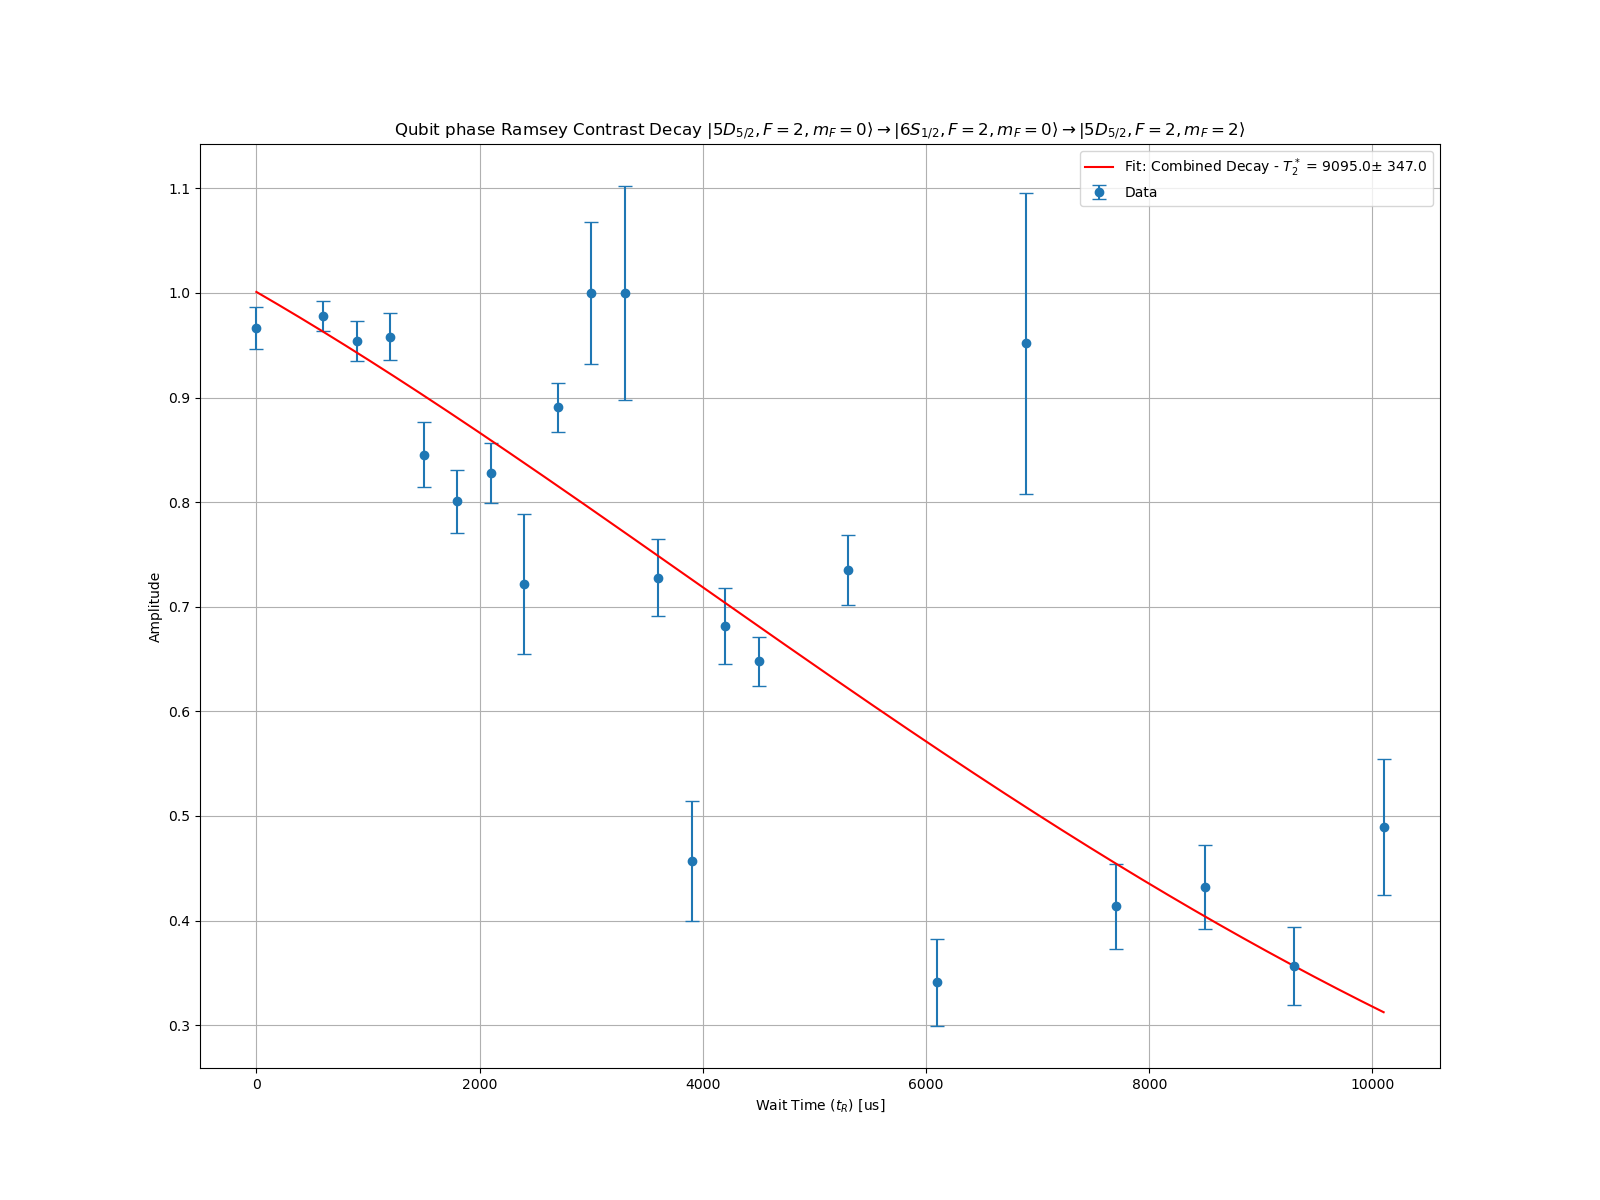

In [151]:
import numpy as np
import matplotlib.pyplot as plt

# Combined Gaussian and Lorentzian decay function
def combined_decay(t, A, T2_G, T2_L):
    gaussian_decay = np.exp(-(t / T2_G) ** 2)
    lorentzian_decay = np.exp(-t / T2_L)
    return A * (gaussian_decay * lorentzian_decay)

# Plot the amplitude data, fit, and error bars
def plot_fit(wait_times, amplitudes, errors, T2_G,sigma_T2_eff, T2_L, A, T2_eff, num1, num2, num3,num4,num5,num6):
    t_fit = np.linspace(min(wait_times), max(wait_times), 1000)
    amplitude_fit = combined_decay(t_fit, A, T2_G, T2_L)

    plt.figure(figsize=(16, 12))
    # Plot the amplitude data with error bars
    plt.errorbar(np.array(wait_times), amplitudes, yerr=errors, fmt='o', label='Data', capsize=5)
    
    # Plot the fit curve
    plt.plot(t_fit, amplitude_fit, color='red', label=rf'Fit: Combined Decay - $T_2^*$ = {np.round(T2_eff)}± {np.round(sigma_T2_eff)}')
    plt.grid()
    plt.xlabel('Wait Time ($t_R$) [us]')
    plt.ylabel('Amplitude')
    plt.title(rf'Qubit phase Ramsey Contrast Decay $|5D_{{5/2}},F={num2},m_F = {num3}\rangle \rightarrow |6S_{{1/2}},F=2,m_F = {num4}\rangle \rightarrow |5D_{{5/2}},F={num5},m_F = {num6}\rangle$ ')
    plt.legend()
    
    # Save the figure
    plt.savefig(f'Ramsey_contrast_decay_[[{num1},{num2},{num3}],[{num4},{num5},{num6}].png', dpi=300)
    plt.show()

# Example usage assuming the fit was successful
# Replace the following values with actual fit results and data:

plot_fit(wait_times, amplitudes, errors, T2_G,sigma_T2_eff, T2_L, A, T2_eff, num1, num2, num3,num4,num5,num6)


In [17]:
%matplotlib widget

In [1119]:
def Fit_contrast_decay(triplet):
    dt_list = extract_datetime_strings('T2_data_qubit.txt',triplet)
    target_date_times = []
    for i in dt_list:
        target_date_times.append(datetime.strptime(i, '%Y%m%d_%H%M'))
    
    wait_time_dict, num1, num2, num3 = search_files_by_datetime(directory_path, target_date_times)
    processed_data = process_all_wait_times(wait_time_dict)
    fitted_params_dict, amplitude_dict = fit_all_wait_times_to_sine(processed_data)
    
    plot_sine_fits(processed_data, fitted_params_dict)
    
    wait_times = []
    amplitudes = []
    errors = []
    
    print("Fitted Amplitudes and Errors:")
    for wait_time, (amplitude, error) in amplitude_dict.items():
        print(f"Wait Time: {wait_time} us, Amplitude: {amplitude} ± {error}")
        wait_times.append(wait_time)
        amplitudes.append(amplitude)
        errors.append(error)
    
    A, T2_G, T2_L, pcov = fit_amplitude_decay(amplitude_dict, error_dict)
    
    
    if all(param is not None for param in [A, T2_G, T2_L, pcov]):
        # Extract standard deviations from the covariance matrix
        sigma_A = np.sqrt(pcov[0, 0])
        sigma_T2_G = np.sqrt(pcov[1, 1])
        sigma_T2_L = np.sqrt(pcov[2, 2])
        cov_T2_G_T2_L = pcov[1, 2]
    
        print(f"Fitted Coherence Times:")
        print(f"A (Amplitude) = {A} ± {sigma_A}")
        print(f"T2_G (Gaussian) = {T2_G} ± {sigma_T2_G}")
        print(f"T2_L (Lorentzian) = {T2_L} ± {sigma_T2_L}")
    
        # Calculate effective coherence time
        T2_eff = calculate_coherence_time(T2_G, T2_L)
    
        # Compute partial derivatives for error propagation
        dt_dT2_G, dt_dT2_L = compute_partial_derivatives(T2_G, T2_L, T2_eff)
    
        # Calculate the variance of T2_eff
        sigma_T2_eff_squared = (
            (dt_dT2_G**2) * sigma_T2_G**2 +
            (dt_dT2_L**2) * sigma_T2_L**2 +
            2 * dt_dT2_G * dt_dT2_L * cov_T2_G_T2_L
        )
        sigma_T2_eff = np.sqrt(sigma_T2_eff_squared)
    
        print(f"Effective T2 Time: {T2_eff} ± {sigma_T2_eff}")
    else:
        print("Fit failed or not enough data.")
    
    filename = 'T2_data_qubit.txt'
    write_or_update_t2_eff(filename, num1, num2, num3, T2_eff,sigma_T2_eff,T2_G,T2_L,dt_list)
    plot_fit(wait_times, amplitudes, errors, T2_G, sigma_T2_eff,T2_L, A, T2_eff,num1,num2,num3)

In [909]:
import re

def read_t2_data(filename):
    triplets = []
    T2_eff_list = []
    sigma_T2_eff_list = []
    T2_G_list = []
    T2_L_list = []
    
    # Updated pattern to handle negative numbers
    pattern = r'\[\s*(-?\d+),\s*(-?\d+),\s*(-?\d+)\s*\],\s*([\d.]+),\s*([\d.]+),\s*([\d.]+),\s*([\d.]+)'
    
    with open(filename, 'r') as file:
        for line in file:
            match = re.match(pattern, line.strip())
            if match:
                # Extract the triplet (num1, num2, num3)
                num1 = int(match.group(1))
                num2 = int(match.group(2))
                num3 = int(match.group(3))
                triplets.append([num1, num2, num3])
                print(triplets)
                # Extract the T2_eff, T2_G, and T2_L values
                T2_eff = float(match.group(4))
                sigma_T2_eff = float(match.group(5))
                T2_G = float(match.group(6))
                T2_L = float(match.group(7))
                
                T2_eff_list.append(T2_eff)
                sigma_T2_eff_list.append(sigma_T2_eff)
                T2_G_list.append(T2_G)
                T2_L_list.append(T2_L)
        
    return triplets, T2_eff_list, sigma_T2_eff_list, T2_G_list, T2_L_list


# Example usage
filename = 'T2_data_qubit.txt'  # Replace with your file path

# Read the data from the file
triplets, T2_eff_list,sigma_T2_eff_list, T2_G_list, T2_L_list = read_t2_data(filename)

print(triplets)

[[0, 3, 2]]
[[0, 3, 2], [0, 2, 2]]
[[0, 3, 2], [0, 2, 2], [0, 2, 0]]
[[0, 3, 2], [0, 2, 2], [0, 2, 0], [2, 4, 2]]
[[0, 3, 2], [0, 2, 2], [0, 2, 0], [2, 4, 2], [0, 4, 0]]
[[0, 3, 2], [0, 2, 2], [0, 2, 0], [2, 4, 2], [0, 4, 0], [2, 4, 1]]
[[0, 3, 2], [0, 2, 2], [0, 2, 0], [2, 4, 2], [0, 4, 0], [2, 4, 1], [1, 4, 0]]
[[0, 3, 2], [0, 2, 2], [0, 2, 0], [2, 4, 2], [0, 4, 0], [2, 4, 1], [1, 4, 0], [0, 4, -1]]
[[0, 3, 2], [0, 2, 2], [0, 2, 0], [2, 4, 2], [0, 4, 0], [2, 4, 1], [1, 4, 0], [0, 4, -1], [2, 4, 4]]
[[0, 3, 2], [0, 2, 2], [0, 2, 0], [2, 4, 2], [0, 4, 0], [2, 4, 1], [1, 4, 0], [0, 4, -1], [2, 4, 4]]


In [911]:
Fit_contrast_decay([2,4,4])

ValueError: substring not found